<a href="https://colab.research.google.com/github/yeomny/connect-ssh/blob/master/9%EC%A3%BC%EC%B0%A8_%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type
#### 가 발생하는 경우가 있습니다. 이것은 pandas 버전과 numpy의 버전이 맞지않은 경우에 발생합니다.
#### 위의 에러가 발생하는 경우에는,
#### (1) pip 버전 업그레이드 : (anaconda prompt "관리자권한 실행" 후) python.exe -m pip install --upgrade pip
#### (2) pandas 버전 업그레이드 : (Jupyter Notebook "관리자권한 실행" 후) !pip install pandas --upgrade
#### (3) numpy 버전 업그레이드 :  (Jupyter Notebook "관리자권한 실행" 후) !pip install numpy --upgrade
#### 를 하시기 바랍니다.

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# 7장. 통계분석

# [1] 와인 품질 등급 예측하기

#### p.201
## 4. 데이터준비
### 4.1 다운로드한 CSV 파일 정리하기

In [ ]:
import pandas as pd

In [ ]:
# header=0은 첫 번째 행을 열 이름으로 사용
red_df = pd.read_csv('/content/winequality-red.csv', sep=';')

# red_df = pd.read_csv('/content/winequality-red.csv', sep = ';', header = 0, engine = 'python')
red_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
white_df = pd.read_csv('/content//winequality-white.csv', sep = ';')
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
red_df.to_csv('/content//winequality-red2.csv',index = False)


In [ ]:
white_df.to_csv('/content//winequality-white2.csv', index = False)

### 4.2 데이터 병합하기

In [ ]:
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# 'type'컬럼에 'red' 값으로 추가 열 생성. 하지만 맨 끝에 추가됨
# red_df['type'] ='red'
red_df.insert(0, column = 'type', value = 'red')

ValueError: cannot insert type, already exists

In [ ]:
# red_df = red_df.drop(columns=['type'])
# red_df

In [ ]:
red_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_df.shape

(1599, 13)

In [ ]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
white_df.insert(0, column = 'type', value = 'white')

In [ ]:
white_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
white_df.shape

(4898, 13)

## **merger는 조인 두 데이터프레임의 공통 열 또는 인덱스를 기준으로 하여 조인을 수행, concat은 데이터프레임을 연결(concatenate)하는 데 사용**
import pandas as pd

첫 번째 데이터프레임 생성
df1 = pd.DataFrame({'고객ID': [1, 2, 3, 4],
                    '이름': ['홍길동', '김철수', '이영희', '박영수']})

두 번째 데이터프레임 생성
df2 = pd.DataFrame({'고객ID': [1, 2, 3, 5],
                    '주소': ['서울', '대전', '부산', '인천']})

두 데이터프레임을 고객ID를 기준으로 조인
merged_df = pd.merge(df1, df2, on='고객ID', how='inner')

조인된 데이터프레임 출력
print(merged_df)

In [ ]:
wine = pd.concat([red_df, white_df])

In [ ]:
wine.shape

(6497, 13)

In [ ]:
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
wine.to_csv('/content/wine.csv', index = False)

## 5. 데이터 탐색

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


#### 컬럼이름의 띄어쓰기를 밑줄로 바꾸기

In [ ]:
wine.columns = wine.columns.str.replace(' ', '_')

In [ ]:
wine.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
# sorted() 함수를 사용하여 배열을 정렬한 후 반환
# wine['quality'].unique()

# sorted() 함수를 사용하여 배열을 정렬한 후 반환
sorted(wine.quality.unique())


[3, 4, 5, 6, 7, 8, 9]

In [ ]:
wine.quality.value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [ ]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


## 6. 데이터 모델링

### 6.1 describe( ) 함수로 그룹 비교하기

In [ ]:
wine.groupby('type')['quality'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [ ]:
wine.groupby('type')['quality'].mean()

type
red      5.636023
white    5.877909
Name: quality, dtype: float64

In [ ]:
wine.groupby('type')['quality'].std()

type
red      0.807569
white    0.885639
Name: quality, dtype: float64

In [ ]:
wine.groupby('type')['quality'].agg(['mean', 'std'])

,mean,std
type,,
red,5.636023,0.807569
white,5.877909,0.885639


### 6.2 t-검정과 회귀 분석으로 그룹 비교하기

In [ ]:
# 한번만 실행
!pip install statsmodels

In [ ]:
from scipy import stats

In [ ]:
# OLS: Ordinary Least Squares
# GLM: Generalized Linear Model
from statsmodels.formula.api import ols, glm

In [ ]:
# 'type' 열이 'red'인 행들에 대한 'quality' 열의 데이터를 추출
red_wine_quality = wine.loc[wine['type'] == 'red', 'quality']

In [ ]:
# 'type' 열이 'white'인 행들에 대한 'quality' 열의 데이터를 추출
white_wine_quality = wine.loc[wine['type'] == 'white', 'quality']

In [ ]:
# t 검정 ( 두 집단간 평균차이가 있는지 여부 )
stats.ttest_ind(red_wine_quality, white_wine_quality, equal_var = False)
# 이 결과는 레드 와인과 화이트 와인의 품질 점수 간에 통계적으로 유의한 차이가 있음을 보여줍니다.

TtestResult(statistic=-10.149363059143164, pvalue=8.168348870049682e-24, df=2950.750452166697)

In [ ]:
print(wine.columns)


Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')


In [ ]:
Rformula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + \
            residual_sugar + chlorides + free_sulfur_dioxide + \
            total_sulfur_dioxide + density + pH + sulphates + alcohol'

In [ ]:
# fit(): 마지막으로, 설정한 회귀 모델을 데이터에 적합시킵니다.
# 이 메서드를 호출하여 모델을 데이터에 적합시키고 회귀 분석 결과를 얻습니다.
# 적합된 모델은 regression_result 변수에 할당
regression_result = ols(Rformula, data = wine).fit()

In [ ]:
# chlorides 변수의 p-value가 0.146로 유의수준 0.05보다 크기 때문에 해당 변수는 통계적으로 유의하지 않습니다.
#  따라서 chlorides 변수는 와인 품질에 유의한 영향을 미치지 않는 것으로 해석될 수 있습니다
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                        12:43:08   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6.3 회귀 분석 모델로 새로운 샘플의 품질 등급 예측하기

In [ ]:
# 데이터프레임에서 'quality'와 'type' 열을 제외한 나머지 열들을 포함하는 새로운 데이터프레임을 생성
sample1 = wine[wine.columns.difference(['quality', 'type'])]

In [ ]:
# sample1 데이터프레임에서 첫 번째부터 다섯 번째 행까지를 선택하고, 그 다음에 열을 전체 선택하여 새로운 데이터프레임
sample1 = sample1[0:5][:]

NameError: name 'sample1' is not defined

In [ ]:
sample1_predict = regression_result.predict(sample1)

In [ ]:
sample1_predict

0    4.997607
1    4.924993
2    5.034663
3    5.680333
4    4.997607
dtype: float64

In [ ]:
wine[0:5]['quality']

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

### - 임의의 data로 샘플 만들기

In [ ]:
data = {"fixed_acidity" : [8.5, 8.1], "volatile_acidity":[0.8, 0.5],
"citric_acid":[0.3, 0.4], "residual_sugar":[6.1, 5.8], "chlorides":[0.055,
0.04], "free_sulfur_dioxide":[30.0, 31.0], "total_sulfur_dioxide":[98.0,
99], "density":[0.996, 0.91], "pH":[3.25, 3.01], "sulphates":[0.4, 0.35],
"alcohol":[9.0, 0.88]}

In [ ]:
sample2 = pd.DataFrame(data, columns= sample1.columns)

In [ ]:
sample2

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.00,0.055,0.3,0.996,8.5,30.0,3.25,6.1,0.40,98.0,0.8
1,0.88,0.040,0.4,0.910,8.1,31.0,3.01,5.8,0.35,99.0,0.5


In [ ]:
sample2_predict = regression_result.predict(sample2)

In [ ]:
sample2_predict

0    4.809094
1    7.582129
dtype: float64

## 7. 결과 시각화

### 7.1 와인 유형에 따른 품질 등급 히스토그램 그리기

In [ ]:
# 한번만 실행
!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

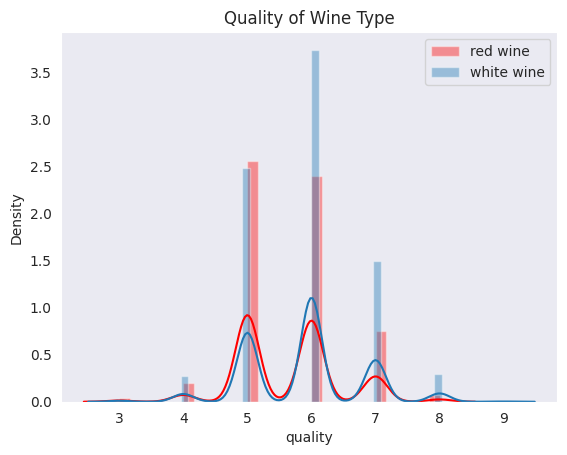

In [ ]:
sns.set_style('dark')
sns.distplot(red_wine_quality, kde = True, color = "red", label = 'red wine')
sns.distplot(white_wine_quality, kde = True, label = 'white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

### 7.2 부분 회귀 플롯으로 시각화하기

In [ ]:
import statsmodels.api as sm

### - fixed_acidity가 종속 변수 quality에 미치는 영향력을 시각화하기

In [ ]:
others = list(set(wine.columns).difference(set(["quality", "fixed_acidity"])))

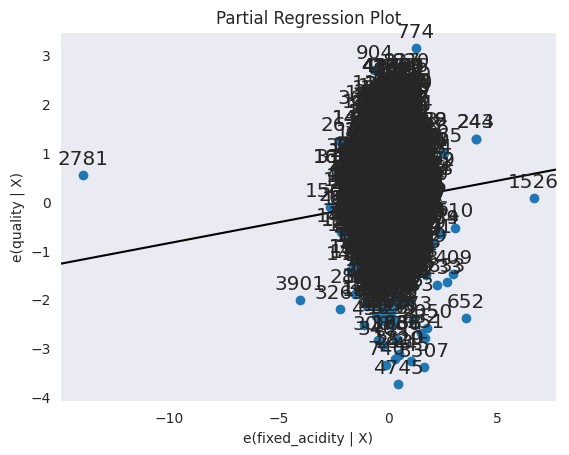

In [ ]:
p, resids = sm.graphics.plot_partregress("quality", "fixed_acidity", others, data = wine, ret_coords = True)

### - 각 독립 변수가 종속 변수 quality에 미치는 영향력을 시각화하기

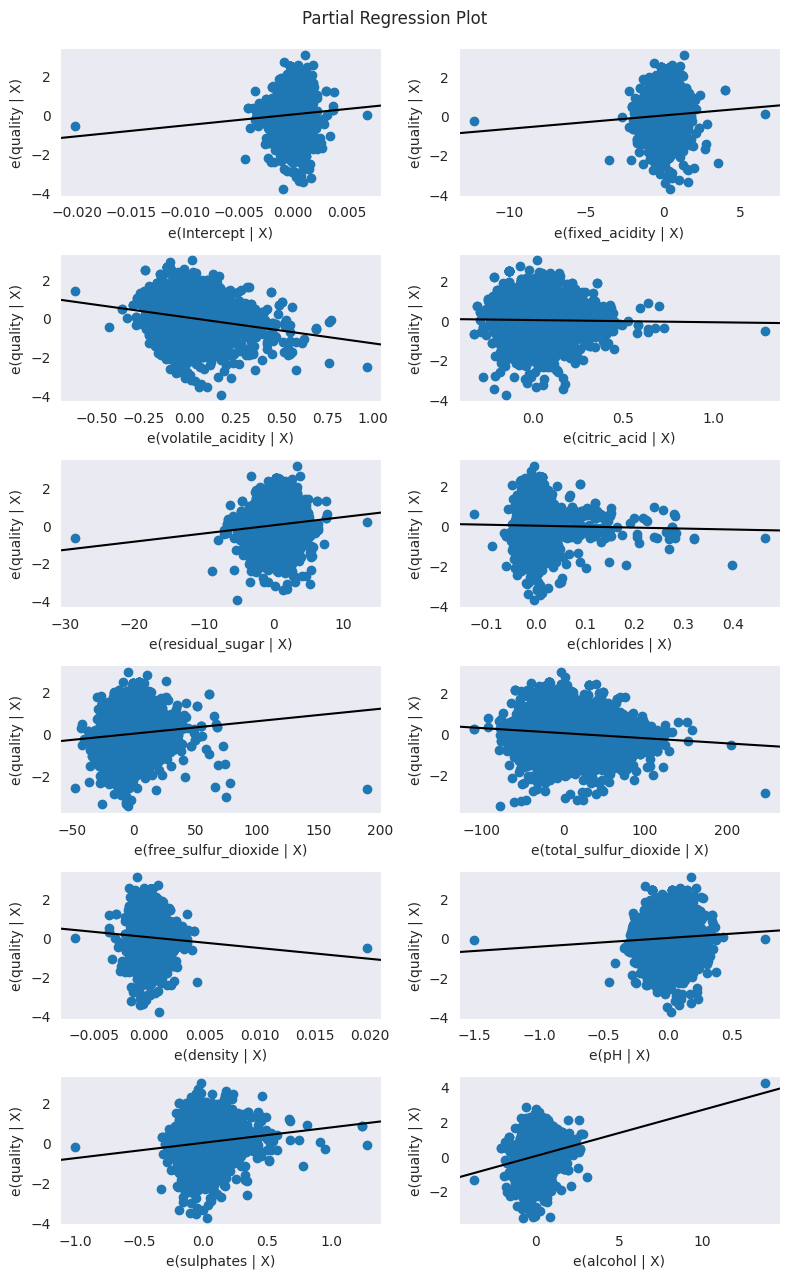

In [ ]:
fig = plt.figure(figsize = (8, 13))
sm.graphics.plot_partregress_grid(regression_result, fig = fig)
plt.show()

------------------------------------------

# [2] 상관분석 + 히트맵
#      타이타닉호 생존율 분석하기

## 3. 데이터 수집

In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
titanic = sns.load_dataset("titanic")

In [ ]:
titanic.to_csv('/content/titanic.csv', index = False)

## 4. 데이터 준비

#### - 결측값 있는지 확인하기

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### - age 열의 결측값을 중앙값으로 치환하기

In [ ]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

#### - embarked 열의 결측값을 최빈값으로 치환하기

In [ ]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
titanic['embarked'] = titanic['embarked'].fillna('S')

#### - embark_town 열의 결측값을 최빈값으로 치환하기

In [ ]:
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [ ]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

#### - deck 열의 결측값을 최빈값으로 치환하기

In [ ]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [ ]:
titanic['deck'] = titanic['deck'].fillna('C')

#### - 결측치가 다 채워졌는지 확인하기

In [ ]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

## 5. 데이터 탐색

### 5.1 데이터의 기본 정보 탐색하기

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

### 5.2 차트를 그려 데이터를 시각적으로 탐색하기

In [ ]:
import matplotlib.pyplot as plt

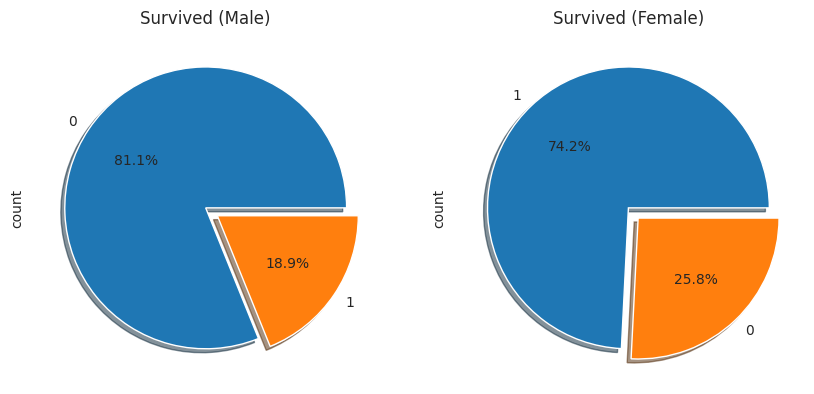

In [ ]:
f,ax = plt.subplots(1, 2, figsize = (10, 5))

titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[1], shadow = True)
ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')

plt.show()

### 5.3 등급별 생존자 수를 차트로 나타내기

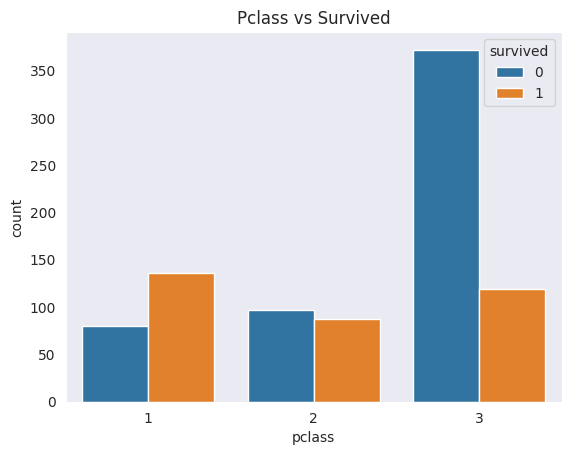

In [ ]:
# sns.countplot('pclass', hue = 'survived', data = titanic)
# plt.title('Pclass vs Survived')
# plt.show()

sns.countplot(x='pclass', hue='survived', data=titanic)
plt.title('Pclass vs Survived')
plt.show()


## 6. 데이터 모델링

### 6.1 상관분석을 위한 상관계수를 구하고 저장하기

In [ ]:
# titanic_corr = titanic.corr(method = 'pearson')
# 범주형 데이터를 포함하지 않는 숫자형 열들만을 선택하여 새로운 데이터프레임 생성
numeric_df = titanic.select_dtypes(include=['number'])

# 숫자형 열들 간의 피어슨 상관 계수 계산
titanic_corr = numeric_df.corr(method='pearson')


In [ ]:
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [ ]:
titanic_corr.to_csv('/content/titanic_corr.csv', index = False)

### 6.2 상관계수 확인하기

#### - 저장한 titanic_corr.csv 파일을 열어본다

### 6.3 특정 변수 사이의 상관계수 구하기

In [ ]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053257

In [ ]:
titanic['survived'].corr(titanic['fare'])

0.2573065223849625

## 7. 결과 시각화

### 7.1 산점도로 상관 분석 시각화하기

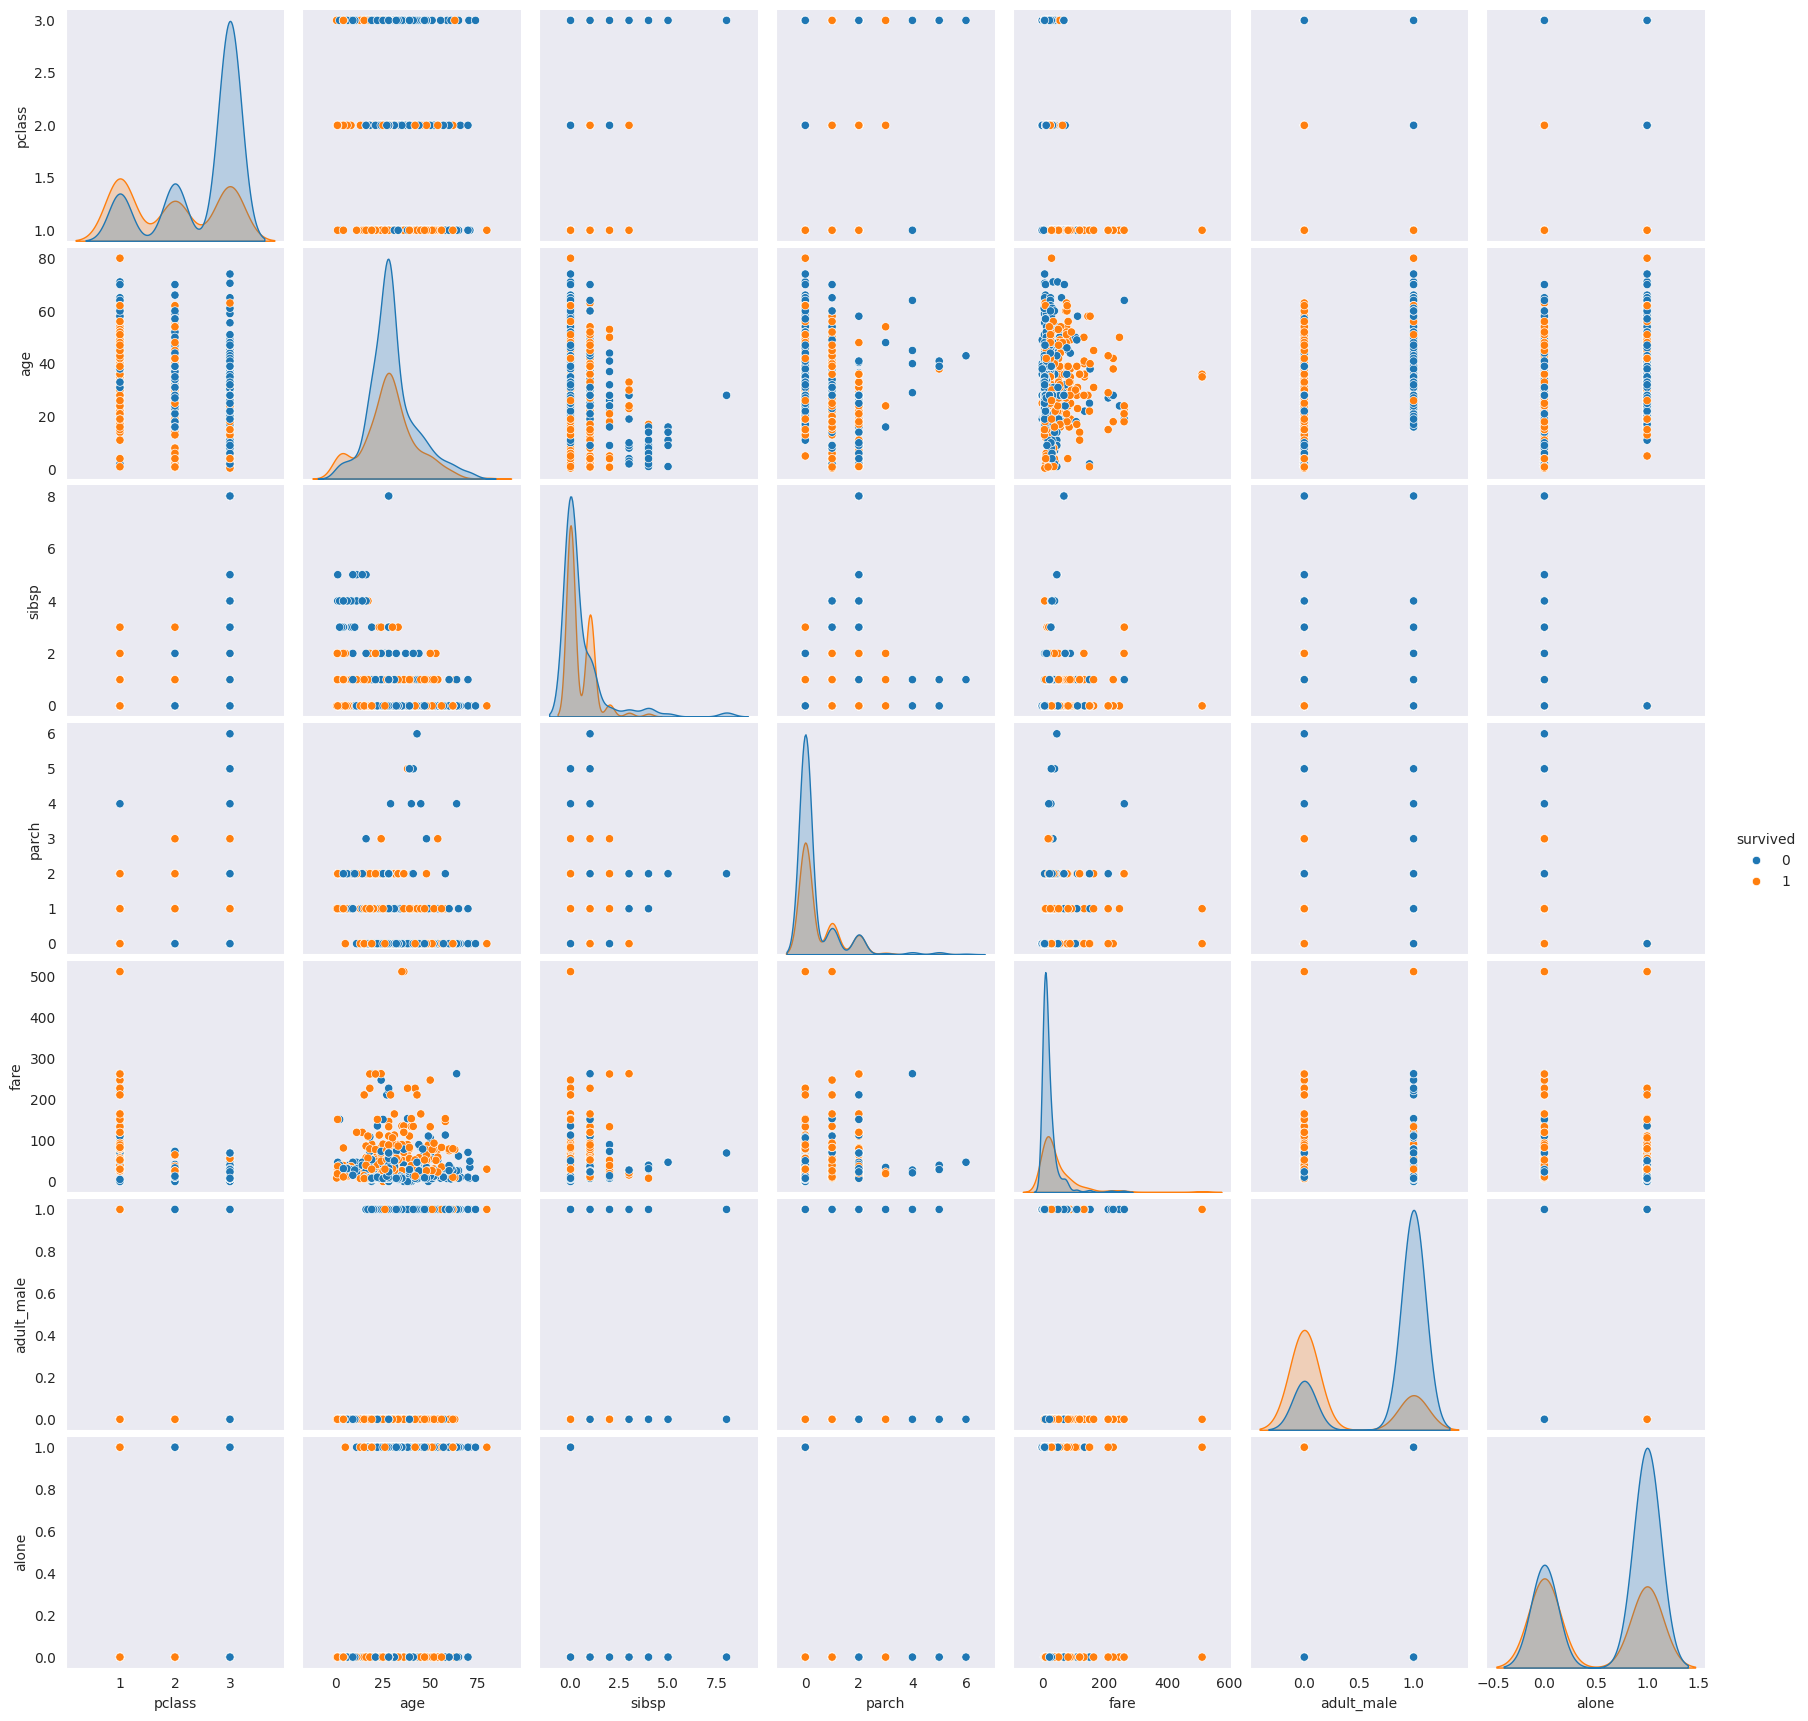

In [ ]:
sns.pairplot(titanic, hue = 'survived')

plt.show()

### 7.2 두 변수의 상관관계 시각화하기

#### - 객실 등급과 생존의 상관관계를 seaborn 패키지의 catplot으로 시각화해보자

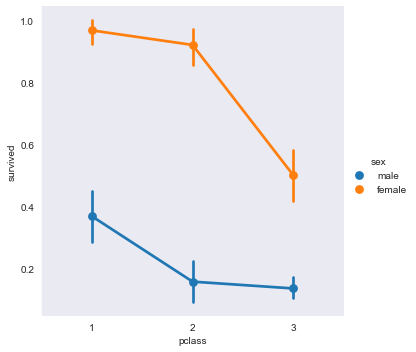

In [ ]:
sns.catplot(x = 'pclass', y = 'survived', hue = 'sex', data = titanic, kind = 'point')

plt.show()

### 7.3 변수 사이의 상관 계수를 히트맵으로 시각화하기

In [ ]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [ ]:
titanic['age2'] = titanic['age'].apply(category_age)

In [ ]:
titanic['sex'] = titanic['sex'].map({'male':1, 'female':0})

In [ ]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] + 1

In [ ]:
titanic.to_csv('./7장_data/titanic3.csv', index = False)

In [ ]:
heatmap_data = titanic[['survived', 'sex', 'age2', 'family', 'pclass', 'fare']]

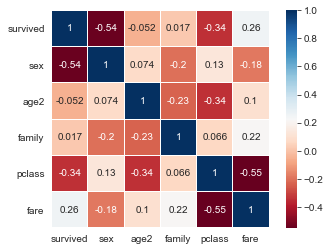

In [ ]:
colormap = plt.cm.RdBu

sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = 'white', annot = True,
annot_kws = {"size": 10})

plt.show()